# Time normalization of data

Marcos Duarte

Time normalization is usually employed for the temporal alignment of cyclic data obtained from different trials with different duration (number of points). The most simple and common procedure for time normalization used in Biomechanics and Motor Control is knwown as the normalization to percent cycle (although it might not be the most adequate procedure in certain cases ([Helwig et al., 2011](http://www.sciencedirect.com/science/article/pii/S0021929010005038)).

In the percent cycle, a fixed number (typically a temporal base from 0 to 100%) of new equaly spaced data is created based on the old data with a mathematical procedure knwon as interpolation.   
**Interpolation** is the estimation of new data points within the range of known data points. This is different from **extrapolation**, the estimation of data points outside the range of known data points.   
Time normalization of data using interpolation is a simple procedure and it doesn't matter if the original data have more or less data points than desired.

The Python function `tnorm.py` (code at the end of this text) implements the normalization to percent cycle procedure for time normalization. The function signature is:   
```python
yn, tn, indie = tnorm(y, axis=0, step=1, k=3, smooth=0, mask=None, show=False, ax=None)
```   
Let's see now how to perform interpolation and time normalization; first let's import the necessary Python libraries and configure the environment:

<!-- TEASER_END -->

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath

For instance, consider the data shown next. The time normalization of these data to represent a cycle from 0 to 100%, with a step of 1% (101 data points) is:

In [2]:
y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
print("y data:")
y

y data:


[5, 4, 10, 8, 1, 10, 2, 7, 1, 3]

In [3]:
t  = np.linspace(0, 100, len(y))  # time vector for the original data
tn = np.linspace(0, 100, 101)     # new time vector for the new time-normalized data
yn = np.interp(tn, t, y)          # new time-normalized data
print("y data interpolated to 101 points:")
yn

y data interpolated to 101 points:


array([ 5.  ,  4.91,  4.82,  4.73,  4.64,  4.55,  4.46,  4.37,  4.28,
        4.19,  4.1 ,  4.01,  4.48,  5.02,  5.56,  6.1 ,  6.64,  7.18,
        7.72,  8.26,  8.8 ,  9.34,  9.88,  9.86,  9.68,  9.5 ,  9.32,
        9.14,  8.96,  8.78,  8.6 ,  8.42,  8.24,  8.06,  7.58,  6.95,
        6.32,  5.69,  5.06,  4.43,  3.8 ,  3.17,  2.54,  1.91,  1.28,
        1.45,  2.26,  3.07,  3.88,  4.69,  5.5 ,  6.31,  7.12,  7.93,
        8.74,  9.55,  9.68,  8.96,  8.24,  7.52,  6.8 ,  6.08,  5.36,
        4.64,  3.92,  3.2 ,  2.48,  2.15,  2.6 ,  3.05,  3.5 ,  3.95,
        4.4 ,  4.85,  5.3 ,  5.75,  6.2 ,  6.65,  6.88,  6.34,  5.8 ,
        5.26,  4.72,  4.18,  3.64,  3.1 ,  2.56,  2.02,  1.48,  1.02,
        1.2 ,  1.38,  1.56,  1.74,  1.92,  2.1 ,  2.28,  2.46,  2.64,
        2.82,  3.  ])

The key is the Numpy `interp` function, from its help:   

>interp(x, xp, fp, left=None, right=None)       
>One-dimensional linear interpolation.   
>Returns the one-dimensional piecewise linear interpolant to a function with given values at discrete data-points.

A plot of the data will show what we have done:

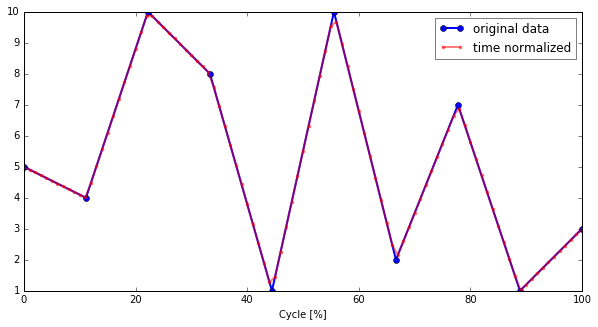

In [4]:
plt.figure(figsize=(10,5))
plt.plot(t, y, 'bo-', lw=2, label='original data')
plt.plot(tn, yn, '.-', color=[1, 0, 0, .5], lw=2, label='time normalized')
plt.legend(loc='best', framealpha=.5)
plt.xlabel('Cycle [%]')
plt.show()

The function `tnorm.py` implments this kind of normaliztion with option for a different interpolation than the linear one used, deal with missing points in the data (if these missing points are not at the extremities of the data because the interpolation function can not extrapolate data), other things.   
Let's see the `tnorm.py` examples:

In [5]:
from tnorm import tnorm

In [6]:
    >>> # Default options: cubic spline interpolation passing through
    >>> # each datum, 101 points, and no plot
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> tnorm(y)

(array([  5.        ,   4.17809249,   3.5387693 ,   3.06958033,
          2.75807549,   2.59180468,   2.55831781,   2.64516477,
          2.83989546,   3.13005979,   3.50320766,   3.94688897,
          4.44865363,   4.99605153,   5.57663259,   6.17794669,
          6.78754374,   7.39297365,   7.98178632,   8.54153165,
          9.05975953,   9.52401988,   9.9218626 ,  10.24155044,
         10.47700754,  10.62485776,  10.68174158,  10.6442995 ,
         10.509172  ,  10.27299957,   9.93242271,   9.4840819 ,
          8.92461763,   8.25067039,   7.46097301,   6.57858161,
          5.64224479,   4.6909727 ,   3.76377547,   2.89966325,
          2.13764617,   1.51673437,   1.075938  ,   0.85426719,
          0.89073208,   1.22148967,   1.83147733,   2.66132882,
          3.65021709,   4.73731509,   5.86179577,   6.96283209,
          7.97959699,   8.85126343,   9.51700436,   9.91599272,
          9.98916876,   9.73107126,   9.19820454,   8.45052464,
          7.54798763,   6.55054957,   5.

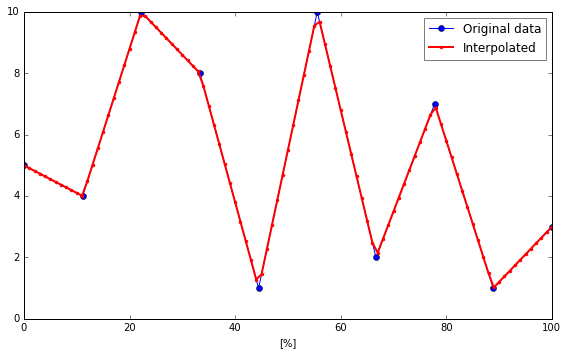

In [7]:
    >>> # Linear interpolation passing through each datum
    >>> yn, tn, indie = tnorm(y, k=1, smooth=0, mask=None, show=True)

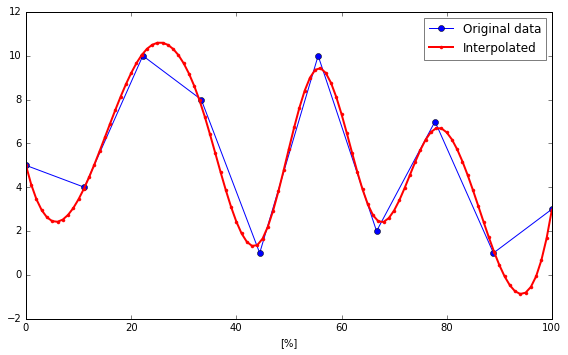

In [8]:
    >>> # Cubic spline interpolation with smoothing
    >>> yn, tn, indie = tnorm(y, k=3, smooth=1, mask=None, show=True)

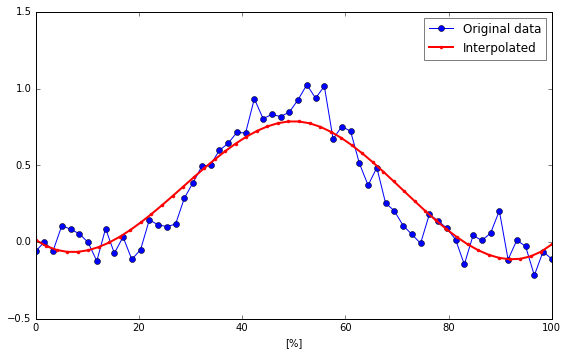

In [9]:
    >>> # Cubic spline interpolation with smoothing and 50 points
    >>> x = np.linspace(-3, 3, 60)
    >>> y = np.exp(-x**2) + np.random.randn(60)/10
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)

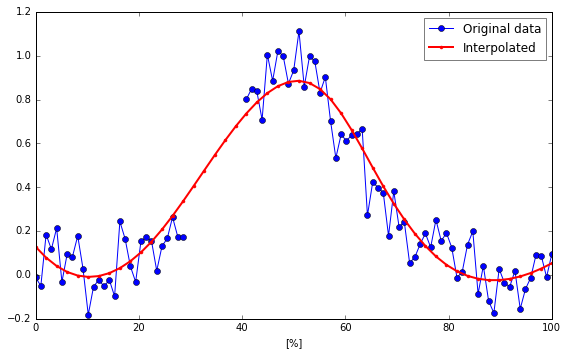

In [10]:
    >>> # Deal with missing data (use NaN as mask)
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[0] = np.NaN # first point is also missing
    >>> y[30: 41] = np.NaN # make other 10 missing points
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)

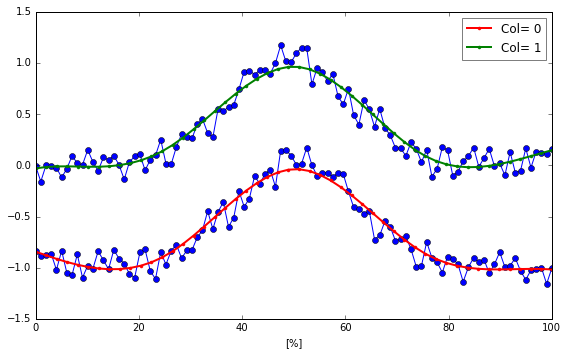

In [11]:
    >>> # Deal with 2-D array
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y = np.vstack((y-1, y[::-1])).T
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)

## Function tnorm.py

In [ ]:
# %load './../functions/tnorm.py'
"""Time normalization (from 0 to 100% with step interval)."""

from __future__ import division, print_function
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.4"
__license__ = "MIT"


def tnorm(y, axis=0, step=1, k=3, smooth=0, mask=None, show=False, ax=None):
    """Time normalization (from 0 to 100% with step interval).

    Time normalization is usually employed for the temporal alignment of data
    obtained from different trials with different duration (number of points).
    This code implements a procedure knwown as the normalization to percent
    cycle, the most simple and common method used among the ones available,
    but may not be the most adequate [1]_.

    NaNs and any value inputted as a mask parameter and that appears at the
    extremities are removed before the interpolation because this code does not
    perform extrapolation. For a 2D array, the entire row with NaN or a mask
    value at the extermity is removed because of alignment issues with the data
    from different columns. NaNs and any value inputted as a mask parameter and
    that appears in the middle of the data (which may represent missing data)
    are ignored and the interpolation is performed throught these points.

    This code can perform simple linear interpolation passing throught each
    datum or spline interpolation (up to quintic splines) passing through each
    datum (knots) or not (in case a smoothing parameter > 0 is inputted).

    See this IPython notebook [2]_.

    Parameters
    ----------
    y : 1-D or 2-D array_like
        Array of independent input data. Must be increasing.
        If 2-D array, the data in each axis will be interpolated.
    axis : int, 0 or 1, optional (default = 0)
        Axis along which the interpolation is performed.
        0: data in each column are interpolated; 1: for row interpolation
    step : float or int, optional (default = 1)
        Interval from 0 to 100% to resample y or the number of points y
        should be interpolated. In the later case, the desired number of
        points should be expressed with step as a negative integer.
        For instance, step = 1 or step = -101 will result in the same
        number of points at the interpolation (101 points).
        If step == 0, the number of points will be the number of data in y.
    k : int, optional (default = 3)
        Degree of the smoothing spline. Must be 1 <= k <= 5.
        If 3, a cubic spline is used.
        The number of data points must be larger than k.
    smooth : float or None, optional (default = 0)
        Positive smoothing factor used to choose the number of knots.
        If 0, spline will interpolate through all data points.
        If None, smooth=len(y).
    mask : None or float, optional (default = None)
        Mask to identify missing values which will be ignored.
        It can be a list of values.
        NaN values will be ignored and don't need to be in the mask.
    show : bool, optional (default = False)
        True (1) plot data in a matplotlib figure.
        False (0) to not plot.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    yn : 1-D or 2-D array
        Interpolated data (if axis == 0, column oriented for 2-D array).
    tn : 1-D array
        New x values (from 0 to 100) for the interpolated data.
    inds : list
        Indexes of first and last rows without NaNs at the extremities of `y`.
        If there is no NaN in the data, this list is [0, y.shape[0]-1].

    Notes
    -----
    This code performs interpolation to create data with the desired number of
    points using a one-dimensional smoothing spline fit to a given set of data
    points (scipy.interpolate.UnivariateSpline function).

    References
    ----------
    .. [1] http://www.sciencedirect.com/science/article/pii/S0021929010005038
    .. [2] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/TimeNormalization.ipynb

    See Also
    --------
    scipy.interpolate.UnivariateSpline:
    One-dimensional smoothing spline fit to a given set of data points.

    Examples
    --------
    >>> # Default options: cubic spline interpolation passing through
    >>> # each datum, 101 points, and no plot
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> tnorm(y)

    >>> # Linear interpolation passing through each datum
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> yn, tn, indie = tnorm(y, k=1, smooth=0, mask=None, show=True)

    >>> # Cubic spline interpolation with smoothing
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> yn, tn, indie = tnorm(y, k=3, smooth=1, mask=None, show=True)

    >>> # Cubic spline interpolation with smoothing and 50 points
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)

    >>> # Deal with missing data (use NaN as mask)
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[0] = np.NaN # first point is also missing
    >>> y[30: 41] = np.NaN # make other 10 missing points
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)

    >>> # Deal with 2-D array
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y = np.vstack((y-1, y[::-1])).T
    >>> yn, tn, indie = tnorm(y, step=-50, k=3, smooth=1, show=True)
    """

    from scipy.interpolate import UnivariateSpline

    y = np.asarray(y)
    if axis:
        y = y.T
    if y.ndim == 1:
        y = np.reshape(y, (-1, 1))
    # turn mask into NaN
    if mask is not None:
        y[y == mask] = np.NaN
    # delete rows with missing values at the extremities
    iini = 0
    while y.size and np.isnan(np.sum(y[0])):
        y = np.delete(y, 0, axis=0)
        iini += 1
    iend = y.shape[0]-1
    while y.size and np.isnan(np.sum(y[-1])):
        y = np.delete(y, -1, axis=0)
        iend -= 1
    # check if there are still data
    if not y.size:
        return None, None, []
    if y.size == 1:
        return y.flatten(), None, [0, 0]
        
    indie = [iini, iend]

    t = np.linspace(0, 100, y.shape[0])
    if step == 0:
        tn = t
    elif step > 0:
        tn = np.linspace(0, 100, np.round(100 / step + 1))
    else:
        tn = np.linspace(0, 100, -step)
    yn = np.empty([tn.size, y.shape[1]]) * np.NaN
    for col in np.arange(y.shape[1]):
        # ignore NaNs inside data for the interpolation
        ind = np.isfinite(y[:, col])
        if np.sum(ind) > 1:  # at least two points for the interpolation
            spl = UnivariateSpline(t[ind], y[ind, col], k=k, s=smooth)
            yn[:, col] = spl(tn)

    if show:
        _plot(t, y, ax, tn, yn)

    if axis:
        y = y.T
    if yn.shape[1] == 1:
        yn = yn.flatten()

    return yn, tn, indie


def _plot(t, y, ax, tn, yn):
    """Plot results of the tnorm function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 5))

        ax.set_prop_cycle('color', ['b', 'r', 'b', 'g', 'b', 'y', 'b', 'c', 'b', 'm'])
        #ax.set_color_cycle(['b', 'r', 'b', 'g', 'b', 'y', 'b', 'c', 'b', 'm'])
        for col in np.arange(y.shape[1]):
            if y.shape[1] == 1:
                ax.plot(t, y[:, col], 'o-', lw=1, label='Original data')
                ax.plot(tn, yn[:, col], '.-', lw=2,
                        label='Interpolated')
            else:
                ax.plot(t, y[:, col], 'o-', lw=1)
                ax.plot(tn, yn[:, col], '.-', lw=2, label='Col= %d' % col)
            ax.locator_params(axis='y', nbins=7)
            ax.legend(fontsize=12, loc='best', framealpha=.5, numpoints=1)
        plt.xlabel('[%]')
        plt.tight_layout()
        plt.show()


In [ ]:
"""Time normalization (from 0 to 100% with step interval)."""

from __future__ import division, print_function
import numpy as np

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = "1.0.3"
__license__ = "MIT"


def tnorm(y, axis=0, step=1, k=3, smooth=0, mask=None, show=False, ax=None):
    """Time normalization (from 0 to 100% with step interval).

    Time normalization is usually employed for the temporal alignment of data
    obtained from different trials with different duration (number of points).
    This code implements a procedure knwown as the normalization to percent
    cycle, the most simple and common method used among the ones available,
    but may not be the most adequate [1]_.

    NaNs and any value inputted as a mask parameter and that appears at the
    extremities are removed before the interpolation because this code does not
    perform extrapolation. For a 2D array, the entire row with NaN or a mask
    value at the extermity is removed because of alignment issues with the data
    from different columns. NaNs and any value inputted as a mask parameter and
    that appears in the middle of the data (which may represent missing data)
    are ignored and the interpolation is performed throught these points.

    This code can perform simple linear interpolation passing throught each
    datum or spline interpolation (up to quintic splines) passing through each
    datum (knots) or not (in case a smoothing parameter > 0 is inputted).

    See this IPython notebook [2]_.

    Parameters
    ----------
    y : 1-D or 2-D array_like
        Array of independent input data. Must be increasing.
        If 2-D array, the data in each axis will be interpolated.
    axis : int, 0 or 1, optional (default = 0)
        Axis along which the interpolation is performed.
        0: data in each column are interpolated; 1: for row interpolation
    step : float or int, optional (default = 1)
        Interval from 0 to 100% to resample y or the number of points y
        should be interpolated. In the later case, the desired number of
        points should be expressed with step as a negative integer.
        For instance, step = 1 or step = -101 will result in the same
        number of points at the interpolation (101 points).
        If step == 0, the number of points will be the number of data in y.
    k : int, optional (default = 3)
        Degree of the smoothing spline. Must be 1 <= k <= 5.
        If 3, a cubic spline is used.
        The number of data points must be larger than k.
    smooth : float or None, optional (default = 0)
        Positive smoothing factor used to choose the number of knots.
        If 0, spline will interpolate through all data points.
        If None, smooth=len(y).
    mask : None or float, optional (default = None)
        Mask to identify missing values which will be ignored.
        It can be a list of values.
        NaN values will be ignored and don't need to be in the mask.
    show : bool, optional (default = False)
        True (1) plot data in a matplotlib figure.
        False (0) to not plot.
    ax : a matplotlib.axes.Axes instance, optional (default = None).

    Returns
    -------
    yn : 1-D or 2-D array
        Interpolated data (if axis == 0, column oriented for 2-D array).
    tn : 1-D array
        New x values (from 0 to 100) for the interpolated data.

    Notes
    -----
    This code performs interpolation to create data with the desired number of
    points using a one-dimensional smoothing spline fit to a given set of data
    points (scipy.interpolate.UnivariateSpline function).

    References
    ----------
    .. [1] http://www.sciencedirect.com/science/article/pii/S0021929010005038
    .. [2] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/TimeNormalization.ipynb

    See Also
    --------
    scipy.interpolate.UnivariateSpline:
    One-dimensional smoothing spline fit to a given set of data points.

    Examples
    --------
    >>> # Default options: cubic spline interpolation passing through
    >>> # each datum, 101 points, and no plot
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> tnorm(y)

    >>> # Linear interpolation passing through each datum
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> yn, tn = tnorm(y, k=1, smooth=0, mask=None, show=True)

    >>> # Cubic spline interpolation with smoothing
    >>> y = [5,  4, 10,  8,  1, 10,  2,  7,  1,  3]
    >>> yn, tn = tnorm(y, k=3, smooth=1, mask=None, show=True)

    >>> # Cubic spline interpolation with smoothing and 50 points
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> yn, tn = tnorm(y, step=-50, k=3, smooth=1, show=True)

    >>> # Deal with missing data (use NaN as mask)
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y[0] = np.NaN # first point is also missing
    >>> y[30: 41] = np.NaN # make other 10 missing points
    >>> yn, tn = tnorm(y, step=-50, k=3, smooth=1, show=True)

    >>> # Deal with 2-D array
    >>> x = np.linspace(-3, 3, 100)
    >>> y = np.exp(-x**2) + np.random.randn(100)/10
    >>> y = np.vstack((y-1, y[::-1])).T
    >>> yn, tn = tnorm(y, step=-50, k=3, smooth=1, show=True)
    """

    from scipy.interpolate import UnivariateSpline

    y = np.asarray(y)
    if axis:
        y = y.T
    if y.ndim == 1:
        y = np.reshape(y, (-1, 1))
    # turn mask into NaN
    if mask is not None:
        y[y == mask] = np.NaN
    # delete rows with missing values at the extremities
    while y.size and np.isnan(np.sum(y[0])):
        y = np.delete(y, 0, axis=0)
    while y.size and np.isnan(np.sum(y[-1])):
        y = np.delete(y, -1, axis=0)
    # check if there are still data
    if not y.size:
        return None, None
    if y.size == 1:
        return y.flatten(), None

    t = np.linspace(0, 100, y.shape[0])
    if step == 0:
        tn = t
    elif step > 0:
        tn = np.linspace(0, 100, np.round(100 / step + 1))
    else:
        tn = np.linspace(0, 100, -step)
    yn = np.empty([tn.size, y.shape[1]]) * np.NaN
    for col in np.arange(y.shape[1]):
        # ignore NaNs inside data for the interpolation
        ind = np.isfinite(y[:, col])
        if np.sum(ind) > 1:  # at least two points for the interpolation
            spl = UnivariateSpline(t[ind], y[ind, col], k=k, s=smooth)
            yn[:, col] = spl(tn)

    if show:
        _plot(t, y, ax, tn, yn)

    if axis:
        y = y.T
    if yn.shape[1] == 1:
        yn = yn.flatten()

    return yn, tn


def _plot(t, y, ax, tn, yn):
    """Plot results of the tnorm function, see its help."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
    else:
        if ax is None:
            _, ax = plt.subplots(1, 1, figsize=(8, 5))

        ax.set_color_cycle(['b', 'r', 'b', 'g', 'b', 'y', 'b', 'c', 'b', 'm'])
        for col in np.arange(y.shape[1]):
            if y.shape[1] == 1:
                ax.plot(t, y[:, col], 'o-', lw=1, label='Original data')
                ax.plot(tn, yn[:, col], '.-', lw=2,
                        label='Interpolated')
            else:
                ax.plot(t, y[:, col], 'o-', lw=1)
                ax.plot(tn, yn[:, col], '.-', lw=2, label='Col= %d' % col)
            ax.locator_params(axis='y', nbins=7)
            ax.legend(fontsize=12, loc='best', framealpha=.5, numpoints=1)
        plt.xlabel('[%]')
        plt.tight_layout()
        plt.show()


> This page was written in the [IPython Notebook](http://ipython.org/notebook.html).  
To download the notebook click on this option at the top menu or get it from the [github repo](https://github.com/demotu/BMC).